# Trend Detection and Forecasting

This lesson was adapted from educational material written by [Dr. Kateri Salk](https://www.hydroshare.org/user/4912/) for her Fall 2019 Hydrologic Data Analysis course at Duke University. This is the second part of a two-part exercise focusing on time series analysis. 

## Introduction
Time series are a special class of dataset, where a response variable is tracked over time. Time series analysis is a powerful technique that can be used to understand the various temporal patterns in our data by decomposing data into different cyclic trends. Time series analysis can also be used to predict how levels of a variable will change in the future, taking into account what has happened in the past.

## Learning Objectives

1. Choose appropriate time series analyses for trend detection and forecasting
2. Discuss the influence of seasonality on time series analysis
3. Interpret and communicate results of time series analyses 

## Requirements to Complete Lesson 

### Packages
This lesson requires the installation of the following R packages to run the provided script:
- `ggplot2`- Version 3.3.3. Creates elegant data visualisations using the Grammar of Graphics.
- `tidyverse`- Version 1.3.0. A collection of R packages designed for data science.
- `lubridate`- Version 1.7.9. Functions for working with dates/times.
- `scales`-Version 1.1.1. Graphical scales provide methods for automatically determining breaks and labels for axes and legends.
- `dataRetrival`-Version 2.7.6. Retrieval Functions for USGS and EPA Hydrologic and Water Quality Data.
- `stats`-Version 4.0.3. This package contains functions for statistical calculations and random number generation.
- `stlplus`-Version 0.5.1. Decompose a time series into seasonal, trend, and remainder components using an implementation of Seasonal Decomposition of Time Series by Loess (STL) that provides several enhancements over the STL method in the stats package.
- `LAGOSNE`- Version 2.0.2. Client for programmatic access to the Lake Multi-scaled Geospatial and Temporal database <https://lagoslakes.org>, with functions for accessing lake water quality and ecological context data for the US.
- `trend`- Version 1.1.4.  Non-Parametric Trend Tests and Change-Point Detection.
- `forecast`- Version 8.13. Methods and tools for displaying and analysing univariate time series forecasts including exponential smoothing via state space models and automatic ARIMA modelling.
- `tseries`- Version 0.10-48. Time series analysis and computational finance.

### Data and Code 

This lesson will query data from LAGOSNE, a combination of three data modules (LAGOSlocus, LAGOSlimno, LAGOSgeo) designed to be of use for researchers and managers to facilitate further development of our basic understanding of lake water quality at broad scales using water quality data on thousands of lakes collected over the last several decades. The database includes information about lakes in a lake-rich region of 17 states in the United States, including Minnesota, Iowa, Wisconsin, Illinois, Missouri, Michigan, Indiana, Ohio, Pennsylvania, New York, New Jersey, Connecticut, New Hampshire, Rhode Island, Massachusetts, Vermont, and Maine. LAGOSNE contains a complete census of all lakes greater than 4 hectares in the region with supporting ecological context information. Additionally, for a subset of lakes, LAGOSNE contains water quality data. The LAGOSNE package was built so that future data users could easily retrieve and manipulate the data, as well as easily access metadata.

It should be noted that the databases are not static as data is constantly being added.  For more in-depth information on the `LAGOSNE` package, please visit https://github.com/cont-limno/LAGOSNE and 
https://cont-limno.github.io/LAGOSNE/articles/lagosne_structure.html.

The code provided in this resource was developed using R version 3.6.1. 

### Set Working Directory 

In R, the working directory is the directory where R starts when looking for any file to open (as directed by a file path) and where it saves any output. This lesson assumes that you have set your working directory to the folder location of the downloaded and unzipped data subsets.

### Load packages and set ggplot theme

In [27]:
options(warn=-1)

library(ggplot2)
library(tidyverse)
library(lubridate)
library(scales)
library(dataRetrieval)
library(stats)
library(stlplus)
library(LAGOSNE)
library(trend)
library(forecast)
library(tseries)

LAGOSdata <- lagosne_load()
theme_set(theme_gray()) 

## Trend analysis

Two types of trends may be present in our time series dataset: **monotonic** or **step**. Monotonic trends are a gradual shift over time that is consistent in direction, for example in response to land use change. Step trends are a distinct shift at a given time point, for example in response to a policy being enacted. 

### Step trend analysis

Step trend analysis works well for upstream/downstream and before/after study design. We will not delve into these methods during class, but specific tests are listed below for future reference. 

Note: ALWAYS look into the assumptions of a given test to ensure it matches with your data and with your research question.

* **Change point detection**, e.g., `pettitt.test` (package: trend) or `breakpoints` (package: strucchange)
* **t-test (paired or unpaired)**
* **Kruskal-Wallis test**: non-parametric version of t-test
* **ANCOVA**, analysis of covariance

### Monotonic trend analysis

In general, detecting a monotonic trend requires a long sequence of data with few gaps. If we are working with monthly data, a time series of at least five years is recommended. Gaps can be accounted for, but a gap that makes up more than 1/3 of the sampling period is generally considered the threshold for considering a gap to be too long (a step trend analysis might be better in this situation). 

Adjusting the data may be necessary to fulfill the assumptions of a trend test. These adjustments include **aggregation**, **subsampling**, and **interpolation**. What do each of these mean, and why might we want to use them?

> aggregation: 

> subsampling: 

> interpolation: 

Specific tests for monotonic trend analysis are listed below, with assumptions and tips: 

* **linear regression**: no seasonality, fits the assumptions of a parametric test. Function: `lm`
* **Mann-Kendall**: no seasonality, non-parametric, no temporal autocorrelation, missing data allowed. Function: `mk.test` (package: trend)
* **modified Mann-Kendall**: no seasonality, non-parametric, accounts for temporal autocorrelation, missing data allowed. Function: `mmky` and `mmkh` (package: modifiedmk)
* **Seasonal Mann-Kendall**: seasonality, non-parametric, no temporal autocorelation, identical distribution. Function: `smk.test` (package: trend)

The packages trend, Kendall, and modifiedmk also include other modifications to monotonic trend tests. Look into the documentation for these packages if you are applying a special case.

If covariates (another predictor variable) are included in the dataset, additional tests are recommended. A great resource for trend testing for water quality monitoring, which includes guidance on these cases, has been prepared by the Environmental Protection Agency: https://www.epa.gov/sites/production/files/2016-05/documents/tech_notes_6_dec2013_trend.pdf

## Trend test example: Total Phosphorus in Lake Mendota

Lake Mendota (Wisconsin, USA) is often considered the birthplace of limnology and the most well-studied lake in the world. It has been sampled for over 100 years, and several parts of this dataset are included in the LAGOSNE database. 

Today we will work with total phosphorus data from Lake Mendota to determine whether there has been a monotonic trend in these concentrations over time. 

### Create a data frame for nutrients

In [28]:
LAGOSnutrient <- LAGOSdata$epi_nutr
LAGOSnutrient

eventida10873,lagoslakeid,programid,sampledate,programname,programtype,chla,chla_qual,chla_censorcode,chla_detectionlimit,⋯,ton_labmethodname,tp,tp_qual,tp_censorcode,tp_detectionlimit,tp_labmethodname,secchi,secchi_qual,secchi_censorcode,secchi_methodinfo
<int>,<int>,<int>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
181212,126841,47,1985-11-05,NY_LCI_CHEM,State Agency,8.40,NA,NC1,2,⋯,NA,100,NA,NC1,3.00,EPA_365.1,1.0000,NA,NC3,NA
102404,6456,11,2006-06-15,IL_ALMP,State Agency,5.64,NA,NC2,1,⋯,NA,14,NA,NC2,4.00,MULTIPLE,2.2098,NA,NC4,SECCHI_VIEW_UNKNOWN
102487,6469,11,2006-06-19,IL_ALMP,State Agency,41.90,Q,NC1,1,⋯,NA,88,NA,NC2,4.00,MULTIPLE,0.4572,NA,NC4,SECCHI_VIEW_UNKNOWN
164262,81320,47,1985-11-07,NY_LCI_CHEM,State Agency,1.40,NA,LE1,2,⋯,NA,100,NA,NC1,3.00,EPA_365.1,0.5000,NA,NC3,NA
179320,122514,47,1988-06-23,NY_LCI_CHEM,State Agency,133.20,NA,NC1,2,⋯,NA,700,NA,NC1,3.00,EPA_365.1,0.4000,NA,NC3,NA
102364,6450,11,2006-08-23,IL_ALMP,State Agency,12.30,NA,NC2,1,⋯,NA,14,NA,NC2,4.00,MULTIPLE,0.9144,NA,NC4,SECCHI_VIEW_UNKNOWN
102405,6456,11,2006-07-21,IL_ALMP,State Agency,8.69,NA,NC2,1,⋯,NA,16,NA,NC2,4.00,MULTIPLE,1.9812,NA,NC4,SECCHI_VIEW_UNKNOWN
102406,6456,11,2006-08-07,IL_ALMP,State Agency,4.53,NA,NC2,1,⋯,NA,16,NA,NC2,4.00,MULTIPLE,1.8288,NA,NC4,SECCHI_VIEW_UNKNOWN
102407,6456,11,2006-10-05,IL_ALMP,State Agency,19.70,NA,NC2,1,⋯,NA,16,NA,NC2,4.00,MULTIPLE,2.2860,NA,NC4,SECCHI_VIEW_UNKNOWN


### Use the `lake_info` function to return lake attribute information 

In [29]:
lake_info(name = "Lake Mendota", state = "Wisconsin")

lagoslakeid,nhdid,nhd_lat,nhd_long,lagosname1,meandepth,meandepthsource,maxdepth,maxdepthsource,legacyid,⋯,elevation_m,state,state_name,state_lat,state_long,state_pct_in_nwi,state_ha_in_nwi,state_ha,lakeconnection,iws_ha
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
5371,143249470,43.10773,-89.42273,LAKE MENDOTA,12.8,WI_LTER_SECCHI,25.3,WI_LTER_SECCHI,805400;LAKE MENDOTA,⋯,257.987,WI,Wisconsin,44.63733,-90.01184,100,14529517,14529517,DR_LakeStream,24360.32


## Wrangle a dataset with just the Lake Mendota Total Phosphorus time series

In [30]:
Mendotadata <- LAGOSnutrient %>%
  filter(lagoslakeid == 5371) %>%
  select(sampledate, tp)

## Plot Total Phosphorus concentrations over time

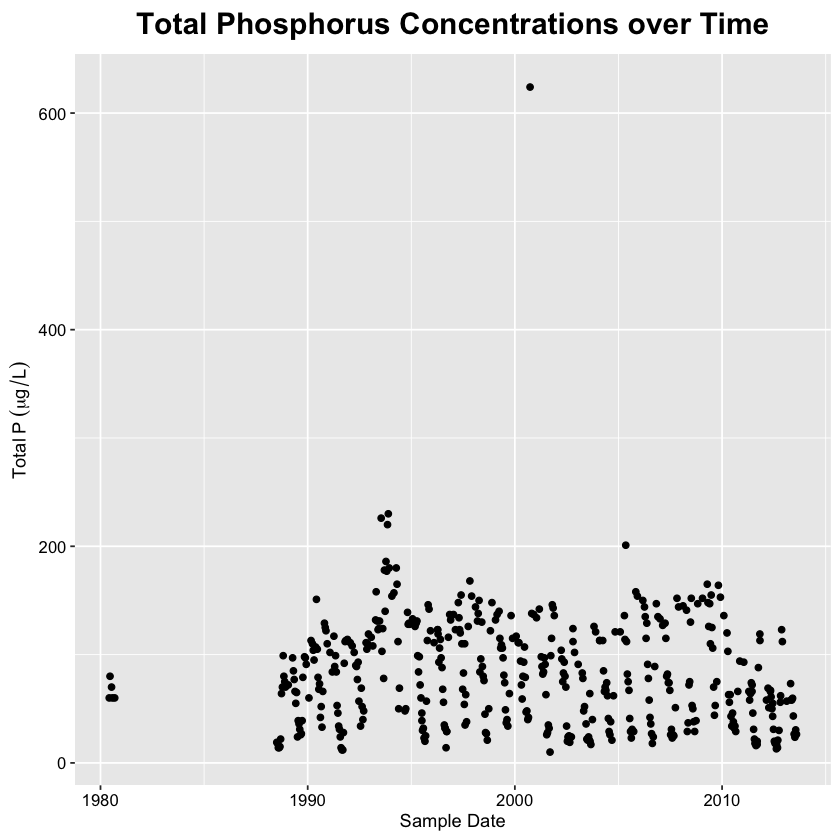

In [31]:
MendotaTP <-
ggplot(Mendotadata, aes(x = sampledate, y = tp)) +
  geom_point()+
ggtitle("Total Phosphorus Concentrations over Time")+
 theme(plot.title = element_text(margin = margin(b = 10), size = 18, hjust=0.5, vjust=0.5, face='bold'), axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
labs(x = "Sample Date", y = expression(Total ~ P ~ (mu*g / L)), color = "Year")
print(MendotaTP)

It is crucially important to visualize your time series before moving forward with any test. In this case, we notice two major issues: 

1. There is a large gap in monitoring in the 1980s
2. There is an unusually large TP value in September 2000

Detecting whether the outlier is a true measurement or a mistake in the dataset would be recommended at this point. Regardless, we know that a single large point that is more than 3x the value of the next largest value in the dataset will interfere with answering our question, particularly if we use this value for interpolation. Let's choose to leave this value out of the dataset for our purposes today (a more thorough QA/QC check would be recommended though).

### Remove issues 1 and 2, arrange by date

In [32]:
Mendotadata <- Mendotadata %>%
  filter(tp < 300 & sampledate > "1988-01-01") %>%
  arrange(sampledate)

## Replot Total Phosphorus Concentrations over time

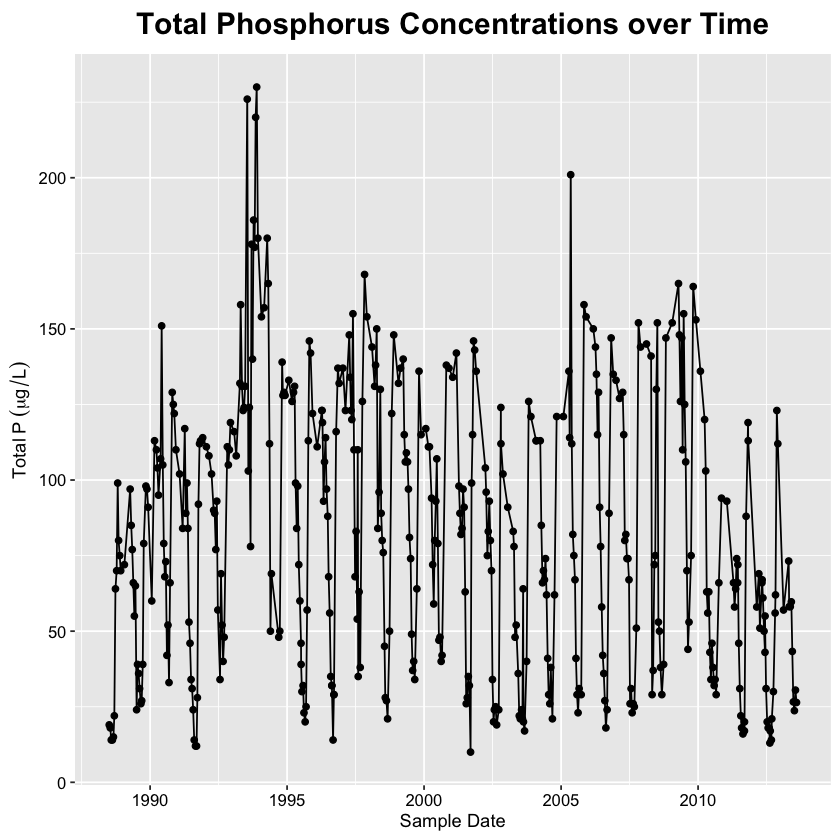

In [33]:
MendotaTP <-
ggplot(Mendotadata, aes(x = sampledate, y = tp)) +
  geom_point() +
  geom_line()+
 ggtitle("Total Phosphorus Concentrations over Time")+
 theme(plot.title = element_text(margin = margin(b = 10), size = 18, hjust=0.5, vjust=0.5, face='bold'), axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
labs(x = "Sample Date", y = expression(Total ~ P ~ (mu*g / L)), color = "Year")

print(MendotaTP)

We see distinct seasonality, with higher TP values occurring in the winter compared to summer. Therefore, we will proceed with a **Seasonal Mann-Kendall** test. 

We see that TP data were collected somewhere between biweekly and monthly across the sampling period. However, the SMK test requires identically distributed data. We will therefore interpolate the data to generate monthly values for TP. 

## Linear Interpolation

In [34]:
# Generate monthly values from July 1988 to August 2013
linearinterpolation <- as.data.frame(approx(Mendotadata, n = 303, method = "linear"))
linearinterpolation$x <- as.Date(linearinterpolation$x, origin = "1970-01-01")
names(linearinterpolation) <- c("Date", "TP")

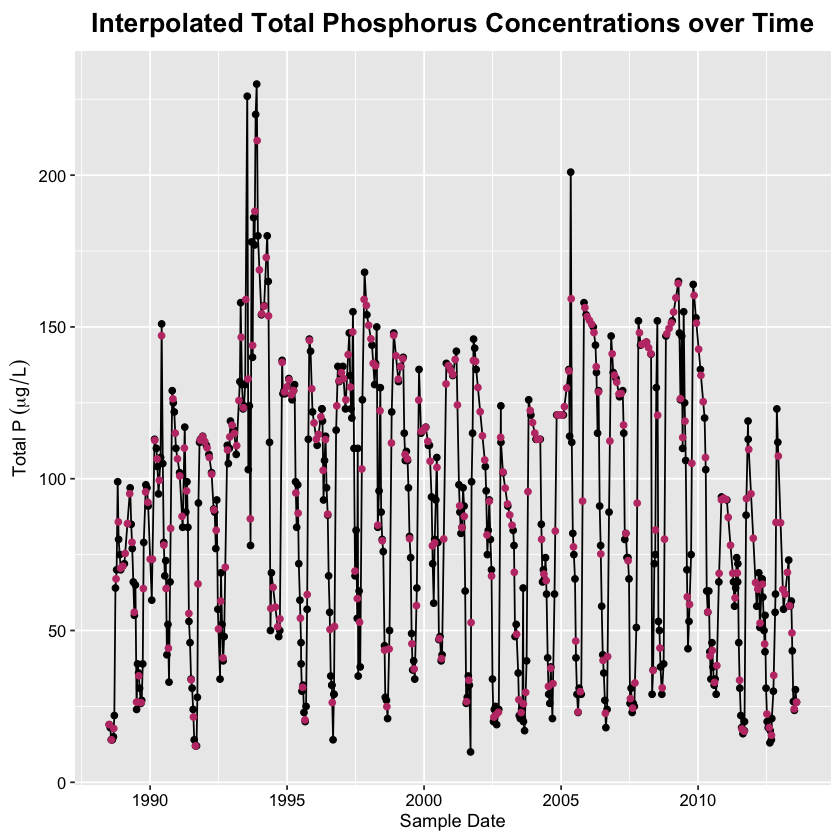

In [35]:
# Inspect interpolated values 
MendotaTPinterpolated <-
ggplot(Mendotadata, aes(x = sampledate, y = tp)) +
  geom_point() +
  geom_line() +
  geom_point(data = linearinterpolation, aes(x = Date, y = TP), color = "#c13d75ff")+
 ggtitle("Interpolated Total Phosphorus Concentrations over Time")+
 theme(plot.title = element_text(margin = margin(b = 10), size = 16, hjust=0.5, vjust=0.5, face='bold'), axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
labs(x = "Sample Date", y = expression(Total ~ P ~ (mu*g / L)), color = "Year")
print(MendotaTPinterpolated)

## Generate Time Series

In [36]:
Mendotatimeseries <- ts(linearinterpolation$TP, frequency = 12, 
                        start = c(1988, 7, 5), end = c(2013, 8, 5))

### Run Seasonal Mann Kendall Test and inspect results

In [37]:
Mendotatrend <- smk.test(Mendotatimeseries)
Mendotatrend
summary(Mendotatrend)


	Seasonal Mann-Kendall trend test (Hirsch-Slack test)

data:  Mendotatimeseries
z = -1.4483, p-value = 0.1475
alternative hypothesis: true S is not equal to 0
sample estimates:
    S  varS 
 -218 22450 



	Seasonal Mann-Kendall trend test (Hirsch-Slack test)

data: Mendotatimeseries
alternative hypothesis: two.sided

Statistics for individual seasons

H0
                      S   varS    tau      z   Pr(>|z|)    
Season 1:   S = 0    56 1833.3  0.187  1.285 0.19895893    
Season 2:   S = 0    42 1833.3  0.140  0.958 0.33828785    
Season 3:   S = 0    28 1833.3  0.093  0.631 0.52831247    
Season 4:   S = 0    -6 1833.3 -0.020 -0.117 0.90703848    
Season 5:   S = 0   -30 1833.3 -0.100 -0.677 0.49821939    
Season 6:   S = 0   -40 1833.3 -0.133 -0.911 0.36237770    
Season 7:   S = 0    31 2058.3  0.095  0.661 0.50845423    
Season 8:   S = 0   -41 2058.3 -0.126 -0.882 0.37795960    
Season 9:   S = 0   -28 1833.3 -0.093 -0.631 0.52831247    
Season 10:   S = 0 -164 1833.3 -0.547 -3.807 0.00014074 ***
Season 11:   S = 0 -114 1833.3 -0.380 -2.639 0.00831237  **
Season 12:   S = 0   48 1833.3  0.160  1.098 0.27234271    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

## Autoregressive and Moving Average Models (ARMA)

We might be interested in characterizing a time series in order to understand what happened in the past and to effectively forecast into the future. Two common models that can approximate time series are **autoregressive** and **moving average** models. To classify these models, we use the  **ACF (autocorrelation function)** and the **PACF (partial autocorrelation function)**, which correspond to the autocorrelation of a series and the correlation of the residuals, respectively. 

**Autoregressive** models operate under the framework that a given measurements is correlated with  previous measurements. For example, an AR1 formulation dictates that a measurement is dependent on the previous measurement, and the value can be predicted by quantifying the lag. 

**Moving average** models operate under the framework that the covariance between a measurement and the previous measurement is zero. While AR models use past forecast *values* to predict future values, MA models use past forecast *errors* to predict future values.

Let's look at how ACF and PACF lags look under different formulations of AR and MA models. 
https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-autoregressive-ar-models.html
https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-moving-average-ma-models.html

Let's upload the Clear Creek discharge dataset. We will **aggregate** the data by averaging monthly values. We will then turn this into a time series, which is the format needed for ARMA modeling. 

In [38]:
ClearCreekDischarge <- readNWISdv(siteNumbers = "06719505",
                     parameterCd = "00060", # discharge (ft3/s)
                     startDate = "",
                     endDate = "")
names(ClearCreekDischarge)[4:5] <- c("Discharge", "Approval.Code")

### Aggregate Clear Creek Discharge dataset

In [39]:
ClearCreekDischarge.Monthly <- ClearCreekDischarge %>%
  mutate(Year = year(Date), 
         Month = month(Date)) %>%
  group_by(Year, Month) %>%
  summarise(Discharge = mean(Discharge))

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



### Remove NAs from Clear Creek Discharge dataset

In [40]:
ClearCreekDischarge.Monthly<-na.omit(ClearCreekDischarge.Monthly)

### Create Time Series Object for Clear Creek Discharge

In [41]:
ClearCreek_ts <- ts(ClearCreekDischarge.Monthly[[3]], frequency = 12)

ARMA models require stationary data. This means that there is no monotonic trend over time and there is also equal variance and covariance across the time series. The function `adf.test` will determine whether our data are stationary. The null hypothesis is that the data are not stationary, so we infer that the data are stationary if the p-value is < 0.05.

## `adf.test`

In [42]:
adf.test(ClearCreek_ts, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  ClearCreek_ts
Dickey-Fuller = -13.438, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


Let's inspect the ACF and pacf plots. Notice these don't match up perfectly with just one AR or MA formulation, so we likely have interactions of both processes at play. 

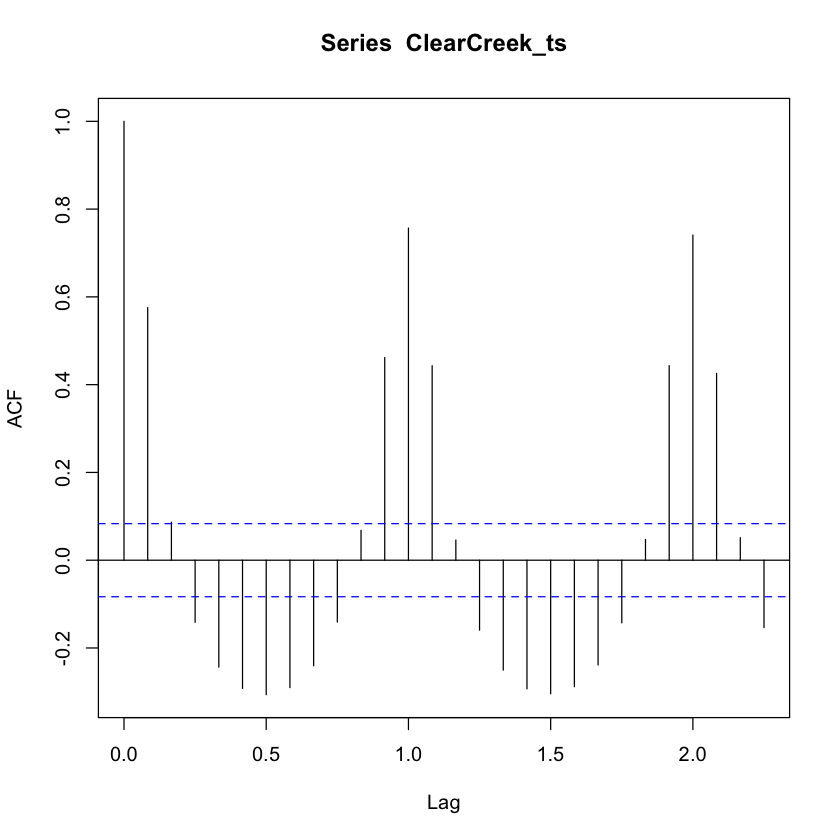

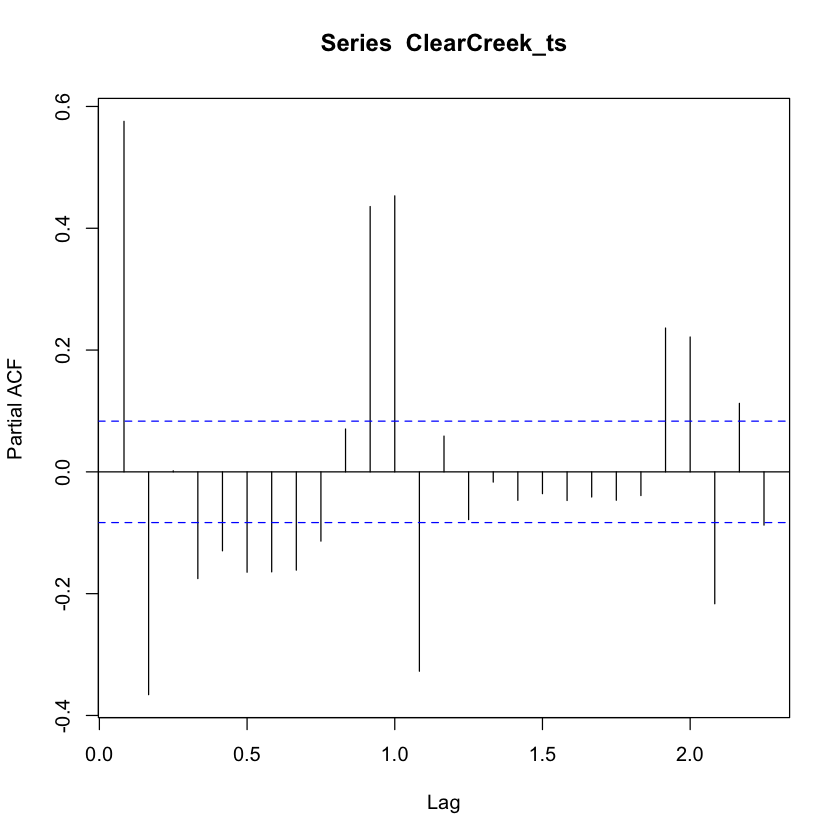

In [43]:
acf(ClearCreek_ts)
pacf(ClearCreek_ts)

While some processes might be easy to identify, it is often complicated to predict the order of AR and MA processes when the operate in the same dataset. To get around this issue, we will run multiple potential formulations of the model and see which one results in the most parsimonious fit using AIC. The function `auto.arima` does this automatically.

## Run the arima function and search for best fit 

In [44]:
auto.arima(ClearCreek_ts, trace = TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 6979.321
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 6661.876
 ARIMA(0,0,1)(0,1,1)[12] with drift         : 6556.189
 ARIMA(0,0,0)(0,1,0)[12]                    : 6977.339
 ARIMA(0,0,1)(0,1,0)[12] with drift         : 6813.481
 ARIMA(0,0,1)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,2)[12] with drift         : 6555.042
 ARIMA(0,0,1)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(1,0,1)(0,1,2)[12] with drift         : 6548.761
 ARIMA(1,0,1)(0,1,1)[12] with drift         : 6549.168
 ARIMA(1,0,1)(1,1,2)[12] with drift         : Inf
 ARIMA(1,0,1)(1,1,1)[12] with drift         : Inf
 ARIMA(1,0,0)(0,1,2)[12] with drift         : 6562.871
 ARIMA(2,0,1)(0,1,2)[12] with drift         : 6551.404
 ARIMA(1,0,2)(0,1,2)[12] with drift         : 6550.373
 ARIMA(0,0,2)(0,1,2)[12] with drif

Series: ClearCreek_ts 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1    drift
      0.5274  -0.5146  -0.0406
s.e.  0.0364   0.0370   0.6293

sigma^2 estimated as 15748:  log likelihood=-3388.64
AIC=6785.27   AICc=6785.35   BIC=6802.46

## Create an object that defines the best fit model

In [45]:
fit <- arima(ClearCreek_ts, c(1, 0, 1),seasonal = list(order = c(2, 1, 0), period = 12))

## Make a prediction into the future

In [46]:
ClearCreekprediction <- predict(fit, n.ahead = 10*12)

## Plot future predictions

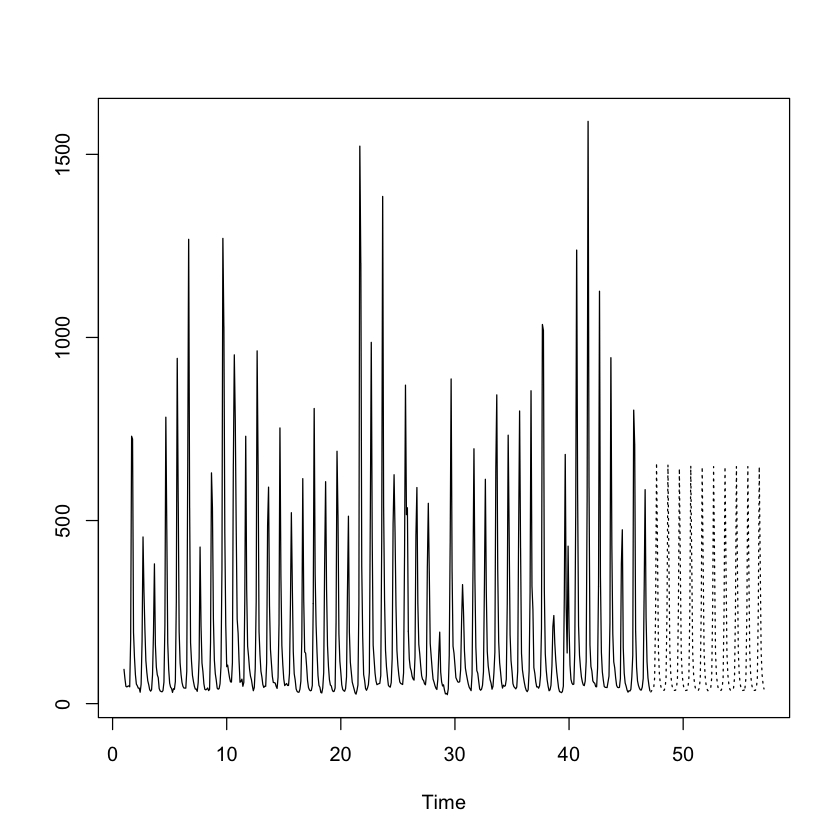

In [47]:
ts.plot(ClearCreek_ts, ClearCreekprediction$pred, lty = c(1, 3))

How do future predictions compare to the past? What other covariates might you bring into the analysis to improve forecasting capabilities?
>